In [18]:
import os

# All required packages for your project
packages = [
    "streamlit",        # Web app framework
    "transformers",     # Hugging Face NLP models
    "torch",            # Backend for transformers
    "newspaper3k",      # Extract news article text
    "beautifulsoup4",   # HTML parsing for newspaper3k
    "lxml",             # XML/HTML parsing for newspaper3k
    "requests"          # HTTP requests (used internally, but safe to install)
]

print("Installing all required packages...")
os.system(f"pip install {' '.join(packages)}")

print("\n✅ All packages installed successfully!")

Installing all required packages...

✅ All packages installed successfully!


In [40]:
import os
from google.colab import userdata

# Fetch Hugging Face token from Colab secrets
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')
print("Hugging Face token set successfully.")

Hugging Face token set successfully.


In [20]:
import requests
import os

API_URL = "https://router.huggingface.co/hf-inference/models/facebook/bart-large-mnli"
headers = {
    "Authorization": f"Bearer {os.environ['HF_TOKEN']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!",
    "parameters": {"candidate_labels": ["refund", "legal", "faq"]},
})

print(output)

{'sequence': 'Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!', 'labels': ['refund', 'faq', 'legal'], 'scores': [0.8777873516082764, 0.10522671788930893, 0.016985908150672913]}


In [21]:
import requests
import os

API_URL = "https://router.huggingface.co/hf-inference/models/facebook/bart-large-mnli"
headers = {
    "Authorization": f"Bearer {os.environ['HF_TOKEN']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!",
    "parameters": {"candidate_labels": ["refund", "legal", "faq"]},
})

print(output)

{'sequence': 'Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!', 'labels': ['refund', 'faq', 'legal'], 'scores': [0.8777873516082764, 0.10522671788930893, 0.016985908150672913]}


In [22]:
import os

print("Installing lxml_html_clean...")
os.system("pip install lxml_html_clean")

print("\n✅ lxml_html_clean installed successfully!")

Installing lxml_html_clean...

✅ lxml_html_clean installed successfully!


In [ ]:
import streamlit as st
from newspaper import Article

st.title("News Article Analysis")

url = st.text_input("Enter the URL of a news article:")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        st.write("Article text fetched successfully:")
        st.write(article_text)
    except Exception as e:
        st.error(f"Error fetching article: {e}")

2025-08-06 16:18:06.472 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.648 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-06 16:18:06.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 16:18:06.673 Thread 'MainThread': mi

In [23]:
%%writefile app.py
import streamlit as st
from newspaper import Article

st.title("News Article Analysis")

url = st.text_input("Enter the URL of a news article:")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        st.write("Article text fetched successfully:")
        st.write(article_text)
    except Exception as e:
        st.error(f"Error fetching article: {e}")

Overwriting app.py


In [15]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os

# Ensure HF_TOKEN is set in the environment
# If you haven't set it using the previous cell, you can do it here:
# os.environ['HF_TOKEN'] = 'YOUR_HF_TOKEN' # Replace 'YOUR_HF_TOKEN' with your actual token

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])

print("Model and tokenizer loaded successfully for local inference.")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Model and tokenizer loaded successfully for local inference.


In [16]:
from transformers import pipeline
import os

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])

print("Zero-shot classification pipeline created successfully.")

Device set to use cpu


Zero-shot classification pipeline created successfully.


In [17]:
#news article fetch
from newspaper import Article

url = input("Please enter the URL of a news article: ")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        print("\nArticle text fetched successfully:")
        print(article_text)
    except Exception as e:
        print(f"Error fetching article: {e}")
else:
    print("No URL entered.")

Please enter the URL of a news article: https://www.bbc.com/news/articles/czer11p6d5go

Article text fetched successfully:
Police respond to council leader's 'rape cover-up' claim

22 hours ago Share Save Chloe Hughes BBC News, West Midlands Share Save

Police and Crime Commissioner Warwickshire Chief Constable Alex Franklin-Smith said the force's priority was to support the victim

Warwickshire Police has responded to a claim it held back information over the alleged rape of a 12-year-old girl in Nuneaton, saying officers "did not and will not cover up such criminality". County council leader George Finch had claimed two men charged in connection with the reported crime were asylum seekers and accused the force and Home Office of covering it up. In a letter addressed to Finch, Chief Constable Alex Franklin-Smith said the force's priority was to support the victim and identify those responsible. Finch, who represents Reform UK, said residents had "not been told the full story" and the 

In [26]:
#narrative rhetoric labels
sequence_to_classify = article_text
narrative_rhetoric_labels = ['Neutral / Everyday Event: Article describes ordinary events such as business openings, cultural celebrations, or routine community updates without political, ideological, or conflict-driven framing',
    'Unclear or Minimal Rhetoric: Article lacks enough information to determine a strong persuasive or ideological framing. Statements are mostly factual or ambiguous without clear narrative intent' ,
    'Us vs Them: Frames one group as morally superior and the other as dangerous, inferior or untrustworthy.',
    'Exceptionalism: Claims a nation or group is unique, morally superior, or destined for a special role in the world.',
    'Security Threat Inflation: Exaggerates or amplifies the scale of a threat to justify urgent or extreme action.',
    'Humanitarian Pretext: Presents intervention or policy as purely altruistic and compassionate, masking strategic goals.',
    'Moral Panic / Outrage: Focuses on moral or ethical violations to spark strong emotional reactions in the public.',
    'Victimhood / Persecution Narrative: Portrays own group as unfairly targeted, oppressed, or under attack.',
    'Destiny & Progress: Frames events as part of inevitable historical progress or being on the right side of history',
    'Unity Against a Common Enemy: Calls for cohesion and solidarity by identifying and opposing a shared adversary.']
classification_results = classifier(sequence_to_classify, candidate_labels, multi_label=True)

print(classification_results)

{'sequence': 'Police respond to council leader\'s \'rape cover-up\' claim\n\n22 hours ago Share Save Chloe Hughes BBC News, West Midlands Share Save\n\nPolice and Crime Commissioner Warwickshire Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim\n\nWarwickshire Police has responded to a claim it held back information over the alleged rape of a 12-year-old girl in Nuneaton, saying officers "did not and will not cover up such criminality". County council leader George Finch had claimed two men charged in connection with the reported crime were asylum seekers and accused the force and Home Office of covering it up. In a letter addressed to Finch, Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim and identify those responsible. Finch, who represents Reform UK, said residents had "not been told the full story" and the only risk to public order came from "the cover-up itself".\n\n"The immigration status of Ahmad Mul

/tmp/ipython-input-1235435217.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


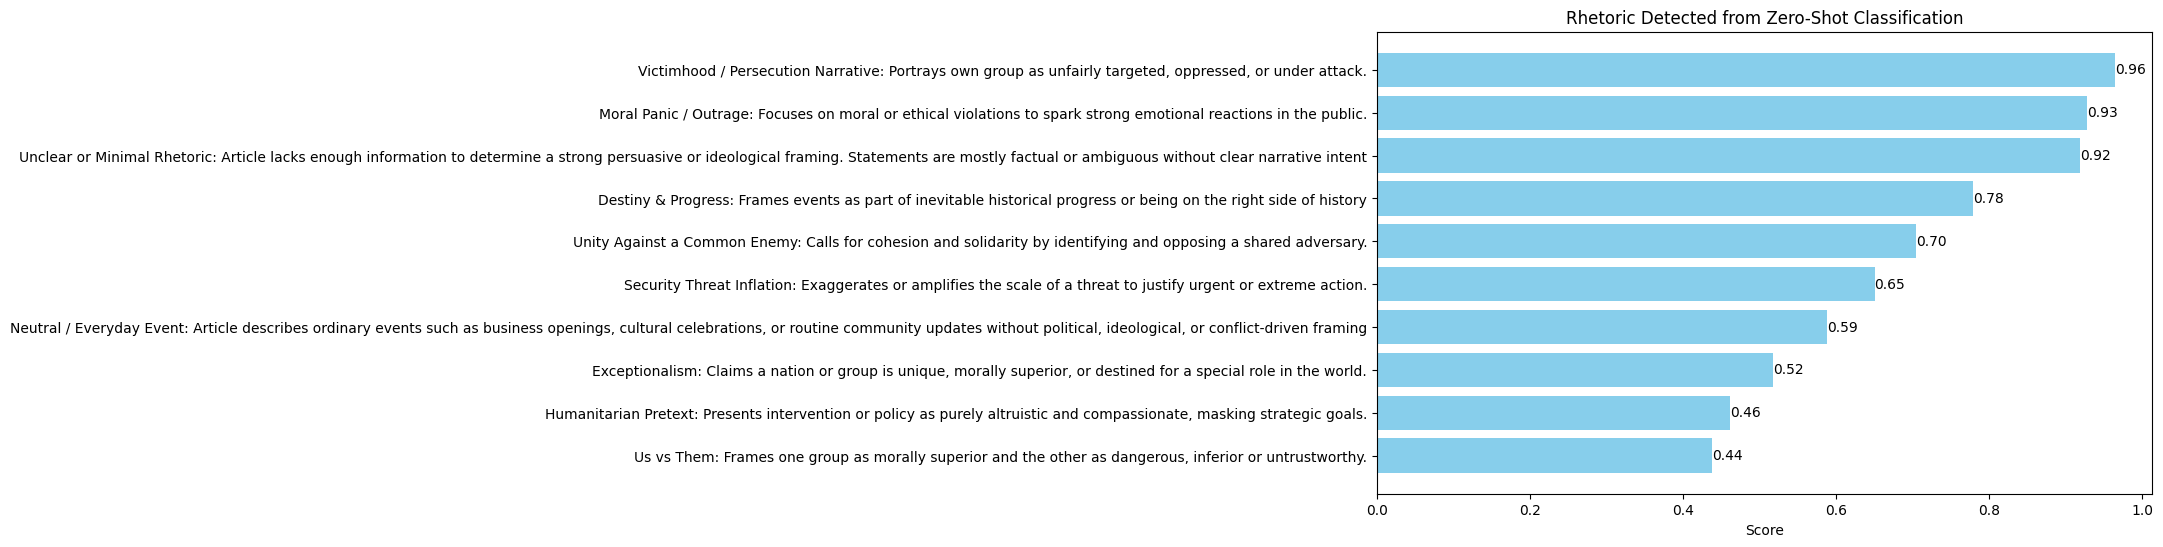

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming classification_results is available from the previous step
# For plotting, it's helpful to have the data in a structured format like a pandas DataFrame
results_df = pd.DataFrame({
    'Label': classification_results['labels'],
    'Score': classification_results['scores']
})

# Sort the DataFrame by score for better visualization
results_df = results_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Label'], results_df['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Rhetoric Detected from Zero-Shot Classification')
plt.gca().invert_yaxis() # To show the highest score at the top

# Add the score values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

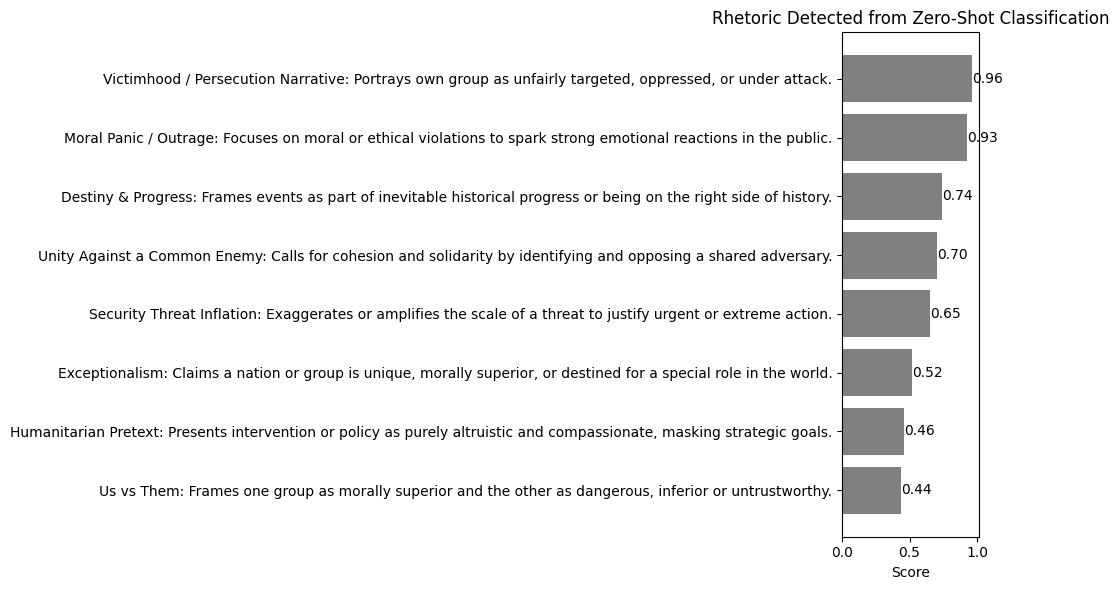

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming analysis_results is available from the previous step
if 'analysis_results' in locals() and analysis_results and 'all_scores' in analysis_results:
    # Convert the all_scores dictionary to a pandas DataFrame for plotting
    results_df = pd.DataFrame(list(analysis_results['all_scores'].items()), columns=['Label', 'Score'])

    # Sort the DataFrame by score for better visualization
    results_df = results_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(results_df['Label'], results_df['Score'], color='gray') # Changed color to 'gray'
    plt.xlabel('Score')
    plt.title('Rhetoric Detected from Zero-Shot Classification')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: analysis_results not found or does not contain 'all_scores'. Please run the analysis cell first.")

In [34]:
#appeal labels
appeal_type_labels = [
    'Emotional appeal/ pathos: targets fear, pride, anger, compassion, hope, justice, jealousy, love, patriotism, pity, sympathy, vivid language,  eg: our way of life is under threat' ,
    'Logical/ pragmatic appeal/ logos: uses statistics, facts, rational arguments, reason, evidence, logic, anecdotes, case studies, analogies, comparisons, cause and effect, proof, eg: data shows crime has doubled' ,
    'Credibility appeal/ ethos: leans on authority, moral standing, expertise, impartiality, confidence in delivery, honesty, fairness, reliability, trustworthy, educated, cites credible sources, reputation'
]

# Assuming article_text is available from the previous cell execution
if 'article_text' in locals() and article_text:
    appeal_classification_results = classifier(article_text, appeal_type_labels, multi_label=True)
    print(appeal_classification_results)
else:
    print("Error: article_text not found. Please run the cell to fetch the article first.")

{'sequence': 'Police respond to council leader\'s \'rape cover-up\' claim\n\n22 hours ago Share Save Chloe Hughes BBC News, West Midlands Share Save\n\nPolice and Crime Commissioner Warwickshire Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim\n\nWarwickshire Police has responded to a claim it held back information over the alleged rape of a 12-year-old girl in Nuneaton, saying officers "did not and will not cover up such criminality". County council leader George Finch had claimed two men charged in connection with the reported crime were asylum seekers and accused the force and Home Office of covering it up. In a letter addressed to Finch, Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim and identify those responsible. Finch, who represents Reform UK, said residents had "not been told the full story" and the only risk to public order came from "the cover-up itself".\n\n"The immigration status of Ahmad Mul

/tmp/ipython-input-224144558.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


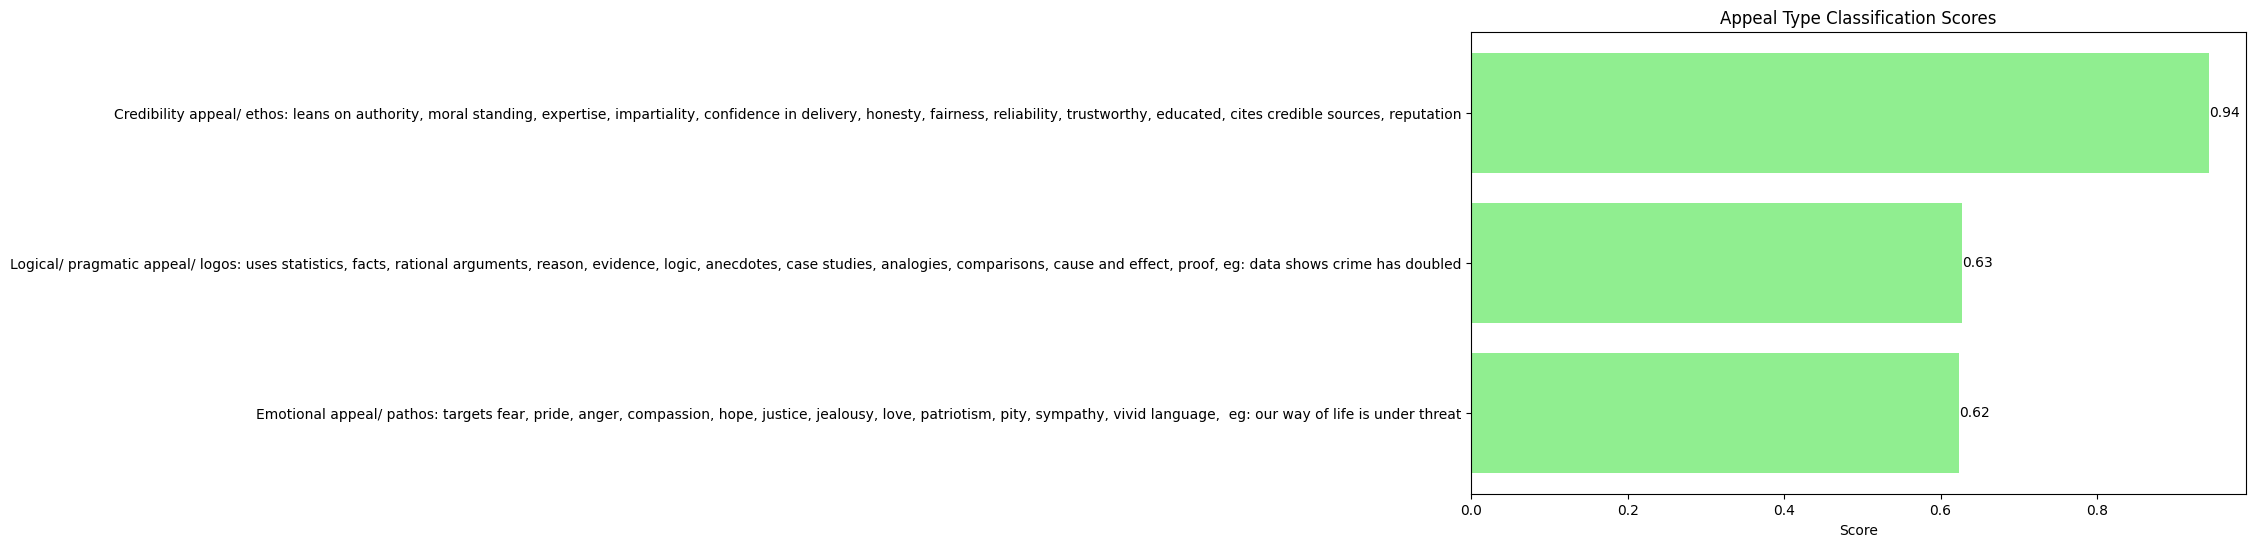

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming appeal_classification_results is available from the previous step
if 'appeal_classification_results' in locals() and appeal_classification_results:
    # Convert the results to a pandas DataFrame for plotting
    appeal_results_df = pd.DataFrame({
        'Label': appeal_classification_results['labels'],
        'Score': appeal_classification_results['scores']
    })

    # Sort the DataFrame by score for better visualization
    appeal_results_df = appeal_results_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(appeal_results_df['Label'], appeal_results_df['Score'], color='lightgreen')
    plt.xlabel('Score')
    plt.title('Appeal Type Classification Scores')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: appeal_classification_results not found. Please run the appeal type classification cell first.")

In [36]:
target_audience_labels = [
    "Nationalists / Patriots: Citizens who value national pride, sovereignty, and cultural identity: Exceptionalism, Us vs Them, Unity Against a Common Enemy",
    "Security‑Conscious Citizens: People prioritizing public safety, stability, and protection from threats: Security Threat Inflation, Us vs Them",
    "Humanitarians / Compassionate Public: Individuals motivated by empathy, fairness, and human rights concerns: Humanitarian Pretext, Victimhood Narratives",
    "Progress‑Oriented Groups: People inspired by innovation, reform, and long‑term vision: Destiny & Progress, Innovation Narratives",
    "Culturally Conservative Groups: Communities seeking to preserve traditional values, customs, or religion: Cultural Preservation, Identity Appeals",
    "Economically Concerned Citizens: Those focused on job security, trade, and financial wellbeing: Economic Threat, Prosperity Narratives",
    "Political Activists / Partisans: Citizens aligned strongly with a political ideology or movement: Moral Panic / Outrage, Us vs Them",
    "Internationally Minded Citizens: People engaged with global cooperation, diplomacy, or multiculturalism: Humanitarian, Progress, Cooperative Narratives"
]

# Assuming article_text and classifier are available
if 'article_text' in locals() and article_text and 'classifier' in locals():
    target_audience_results = classifier(article_text, target_audience_labels, multi_label=True)
    print(target_audience_results)
else:
    print("Error: article_text or classifier not found. Please ensure previous cells are run.")

{'sequence': 'Police respond to council leader\'s \'rape cover-up\' claim\n\n22 hours ago Share Save Chloe Hughes BBC News, West Midlands Share Save\n\nPolice and Crime Commissioner Warwickshire Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim\n\nWarwickshire Police has responded to a claim it held back information over the alleged rape of a 12-year-old girl in Nuneaton, saying officers "did not and will not cover up such criminality". County council leader George Finch had claimed two men charged in connection with the reported crime were asylum seekers and accused the force and Home Office of covering it up. In a letter addressed to Finch, Chief Constable Alex Franklin-Smith said the force\'s priority was to support the victim and identify those responsible. Finch, who represents Reform UK, said residents had "not been told the full story" and the only risk to public order came from "the cover-up itself".\n\n"The immigration status of Ahmad Mul

/tmp/ipython-input-2594666027.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


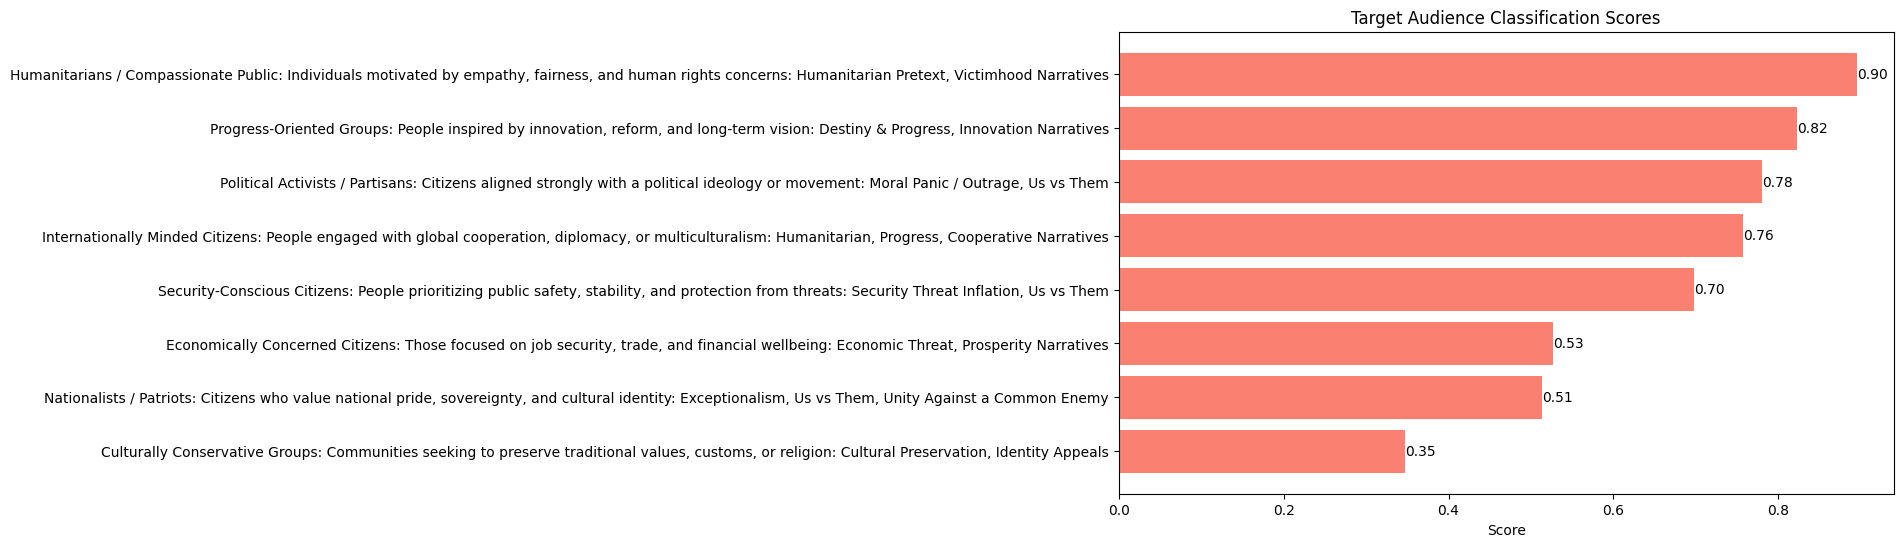

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming target_audience_results is available from the previous step
if 'target_audience_results' in locals() and target_audience_results:
    # Convert the results to a pandas DataFrame for plotting
    target_audience_df = pd.DataFrame({
        'Label': target_audience_results['labels'],
        'Score': target_audience_results['scores']
    })

    # Sort the DataFrame by score for better visualization
    target_audience_df = target_audience_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(target_audience_df['Label'], target_audience_df['Score'], color='salmon')
    plt.xlabel('Score')
    plt.title('Target Audience Classification Scores')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: target_audience_results not found. Please run the target audience classification cell first.")

In [39]:
from transformers import pipeline
from newspaper import Article

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define classification labels
narrative_rhetoric_labels = ['Neutral or Everyday Event |: Article describes ordinary events such as business openings, cultural celebrations, or routine community updates without political, ideological, or conflict-driven framing',
    'Unclear or Minimal Rhetoric | : Article lacks enough information to determine a strong persuasive or ideological framing. Statements are mostly factual or ambiguous without clear narrative intent' ,
    'Us vs Them |: Frames one group as morally superior and the other as dangerous, inferior or untrustworthy.',
    'Exceptionalism | : Claims a nation or group is unique, morally superior, or destined for a special role in the world.',
    'Security Threat Inflation |: Exaggerates or amplifies the scale of a threat to justify urgent or extreme action.',
    'Humanitarian Pretext |: Presents intervention or policy as purely altruistic and compassionate, masking strategic goals.',
    'Moral Panic or Outrage |: Focuses on moral or ethical violations to spark strong emotional reactions in the public.',
    'Victimhood or Persecution | Narrative: Portrays own group as unfairly targeted, oppressed, or under attack.',
    'Destiny & Progress |: Frames events as part of inevitable historical progress or being on the right side of history',
    'Unity Against a Common Enemy |: Calls for cohesion and solidarity by identifying and opposing a shared adversary.']

appeal_type_labels = [
    'Pathos | Emotional appeal: targets fear, pride, anger, compassion, hope, justice, jealousy, love, patriotism, pity, sympathy, vivid language,  eg: our way of life is under threat' ,
    'Logos | Logical/ pragmatic appeal: uses statistics, facts, rational arguments, reason, evidence, logic, anecdotes, case studies, analogies, comparisons, cause and effect, proof, eg: data shows crime has doubled' ,
    'Ethos | Credibility appeal: leans on authority, moral standing, expertise, impartiality, confidence in delivery, honesty, fairness, reliability, trustworthy, educated, cites credible sources, reputation'
]

target_audience_labels = [
    "Nationalists or Patriots |: Citizens who value national pride, sovereignty, and cultural identity: Exceptionalism, Us vs Them, Unity Against a Common Enemy",
    "Security‑Conscious Citizens |: People prioritizing public safety, stability, and protection from threats: Security Threat Inflation, Us vs Them",
    "Humanitarians or Compassionate Public |: Individuals motivated by empathy, fairness, and human rights concerns: Humanitarian Pretext, Victimhood Narratives",
    "Progress‑Oriented Groups |: People inspired by innovation, reform, and long‑term vision: Destiny & Progress, Innovation Narratives",
    "Culturally Conservative Groups |: Communities seeking to preserve traditional values, customs, or religion: Cultural Preservation, Identity Appeals",
    "Economically Concerned Citizens |: Those focused on job security, trade, and financial wellbeing: Economic Threat, Prosperity Narratives",
    "Political Activists or Partisans |: Citizens aligned strongly with a political ideology or movement: Moral Panic / Outrage, Us vs Them",
    "Internationally Minded Citizens |: People engaged with global cooperation, diplomacy, or multiculturalism: Humanitarian, Progress, Cooperative Narratives"
]


def analyze_article_and_summarize(url):
    """Fetches article, performs classifications, and returns a summary."""

    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text.strip()
    except Exception as e:
        return {"error": f"Error fetching article: {e}"}

    if not text:
        return {"error": "Could not extract text from article."}

    # Classify narrative rhetoric
    narrative_rhetoric_results = classifier(text, narrative_rhetoric_labels, multi_label=True)
    # Extract label name before '|'
    primary_rhetoric = narrative_rhetoric_results['labels'][0].split(' |')[0] if narrative_rhetoric_results['scores'][0] > 0.45 else "Neutral / Unclear Rhetoric"


    # Classify appeal type
    appeal_type_results = classifier(text, appeal_type_labels, multi_label=True)
    # Extract label name before '|'
    primary_appeal = appeal_type_results['labels'][0].split(' |')[0]


    # Classify target audience
    target_audience_results = classifier(text, target_audience_labels, multi_label=True)
    # Extract label name before '|'
    primary_target_audience = target_audience_results['labels'][0].split(' |')[0]


    return {
        "primary_rhetoric": primary_rhetoric,
        "primary_appeal": primary_appeal,
        "primary_target_audience": primary_target_audience
    }

# Example usage:
if __name__ == "__main__":
    article_url = input("Please enter the URL of a news article: ")
    summary_results = analyze_article_and_summarize(article_url)

    if "error" in summary_results:
        print(summary_results["error"])
    else:
        print(f"The article primarily uses {summary_results['primary_rhetoric']} framing, appealing to {summary_results['primary_appeal']} and aimed at {summary_results['primary_target_audience']}")

Device set to use cpu


Please enter the URL of a news article: https://www.bbc.com/news/articles/czer11p6d5go
The article primarily uses Unclear or Minimal Rhetoric framing, appealing to Ethos and aimed at Humanitarians or Compassionate Public
